<a href="https://colab.research.google.com/github/you-sif/you-sif/blob/main/Multi_layerPerceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# the data, shuffled and split between a train and test sets
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Epoch 1/10
750/750 [==============================] - 5s 6ms/step - loss: 0.3115 - accuracy: 0.9108 - val_loss: 0.1727 - val_accuracy: 0.9515
Epoch 2/10
750/750 [==============================] - 4s 6ms/step - loss: 0.1373 - accuracy: 0.9588 - val_loss: 0.1199 - val_accuracy: 0.9644
Epoch 3/10
750/750 [==============================] - 5s 7ms/step - loss: 0.0930 - accuracy: 0.9716 - val_loss: 0.1023 - val_accuracy: 0.9692
Epoch 4/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0706 - accuracy: 0.9786 - val_loss: 0.0916 - val_accuracy: 0.9734
Epoch 5/10
750/750 [==============================] - 4s 6ms/step - loss: 0.0541 - accuracy: 0.9834 - val_loss: 0.1026 - val_accuracy: 0.9705
Epoch 6/10
750/750 [==============================] - 5s 6ms/step - loss: 0.0429 - accuracy: 0.9864 - val_loss: 0.0907 - val_accuracy: 0.9737
Epoch 7/10
750/750 [==============================] - 4s 6ms/step - loss: 0.0346 - accuracy: 0.9888 - val_loss: 0.0873 - val_accuracy: 0.9768
Epoch 

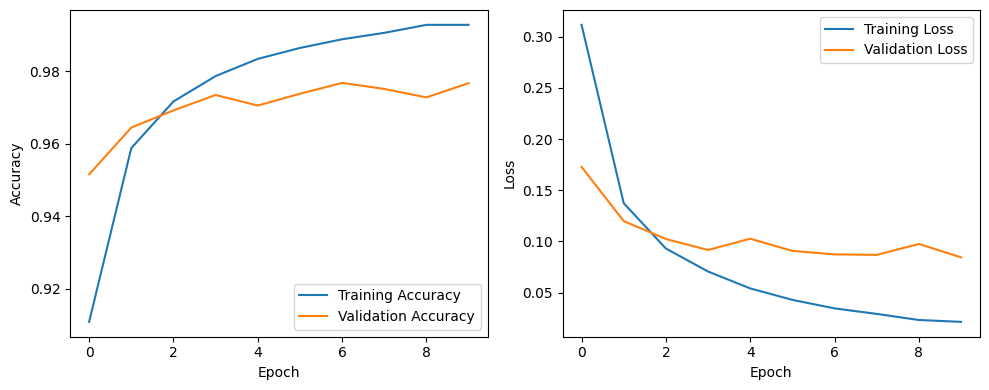

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.datasets import mnist, fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()


# Preprocess the data
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Build the MLP model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot the training history
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()